## Import Libraries

In [ ]:
# mathematics functions
import numpy as np
# data structures and analysis
import pandas as pd
# ploting
import matplotlib.pyplot as plt
# fancy ploting
import seaborn as sns
# SVM
from sklearn.svm import SVC

In [ ]:
#pre prossessing and optimization
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [ ]:
# performance metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, make_scorer, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, mean_squared_error
from yellowbrick.classifier import ClassificationReport

## Read Data

In [ ]:
credit_df = pd.read_csv('./data/credit.csv')
credit_df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
credit_df.drop(['ID'],axis = 1,inplace = True)
#removing ["MARRIAGE"] == 0 and  ["EDUCATION"] == 0
credit_df = credit_df.loc[(credit_df['EDUCATION'] != 0) & (credit_df['MARRIAGE'] != 0)]
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Preprocessing

In [ ]:
# OneHot encoding
credit_df = pd.get_dummies(credit_df,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6'], drop_first=True)
credit_df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5'

In [ ]:
# split dataset into train and test sets
X = credit_df.drop(["DEFAULT"],axis=1)
y = credit_df["DEFAULT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

prediction = dict()


In [ ]:
# SMOTE (if we want to use to balance the minority class)
# used only on train set
# increase minority class sample size to the same as majority class
smote = SMOTE(sampling_strategy='minority', random_state = 2)
X_train_sm , y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()


,count
DEFAULT,
0,17483
1,17483


In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22449, 80)
Number transactions y_train dataset:  (22449,)
Number transactions X_test dataset:  (7483, 80)
Number transactions y_test dataset:  (7483,)


# SVM

In [ ]:
#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Building SVM
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled,y_train)
clf_svm_pred=clf_svm.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


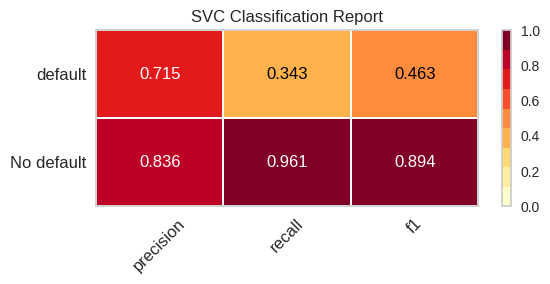

<Axes: title={'center': 'SVC Classification Report'}>

In [ ]:
# Classification Report
mapping = {0: "No default", 1:"default"}

fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(clf_svm,classes=["No default","default"], label_encoder=mapping)
cm_viz.score(X_test_scaled,y_test)
cm_viz.show()

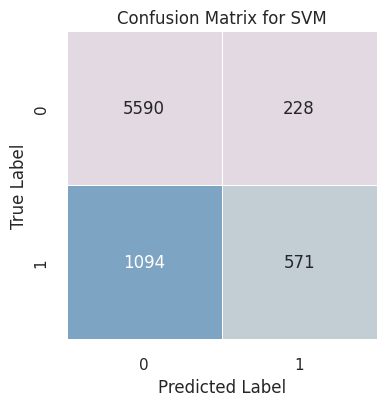

In [ ]:
# Plot confusion matrix for SVM
svm_matrix = confusion_matrix(y_test,clf_svm_pred)
sns.set(font_scale=1)
plt.subplots(figsize=(4, 4))
sns.heatmap(svm_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for SVM');

# SVM with SMOTE

In [ ]:
# scale
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# building SVM
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_sm_scaled, y_train_sm.values)
clf_svm_pred=clf_svm.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


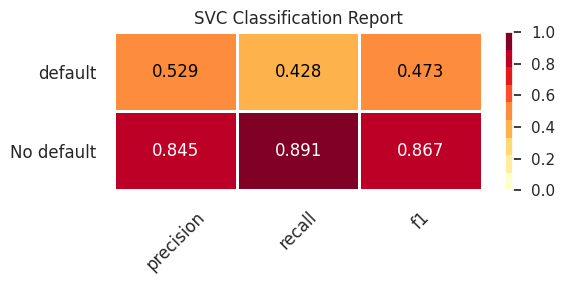

<Axes: title={'center': 'SVC Classification Report'}>

In [ ]:
# Classification Report
mapping = {0: "No default", 1:"default"}

fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(clf_svm,classes=["No default","default"], label_encoder=mapping)
cm_viz.score(X_test_scaled,y_test)
cm_viz.show()

# SVM with Down Sampling

In [ ]:

from sklearn.utils import resample

#Let's take 1000 samples from each category of default

#First splitting the dataset into default and not default dataset
df_no_default = credit_df[credit_df['DEFAULT'] == 0]
df_default = credit_df[credit_df['DEFAULT'] == 1]

#Now downsizing the dataset
df_no_default_downsampled = resample(df_no_default,
                                    replace = False,
                                    n_samples = 1000,
                                    random_state = 42)

df_default_downsampled  = resample(df_default,
                      replace = False,
                      n_samples = 1000,
                      random_state = 42)

df_downsampled = pd.concat([df_no_default_downsampled,df_default_downsampled],axis = 0)
len(df_downsampled)



2000

In [ ]:
X = df_downsampled.drop(["DEFAULT"],axis=1)
y = df_downsampled["DEFAULT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:
#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Building SVM
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled,y_train)
clf_svm_pred=clf_svm.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


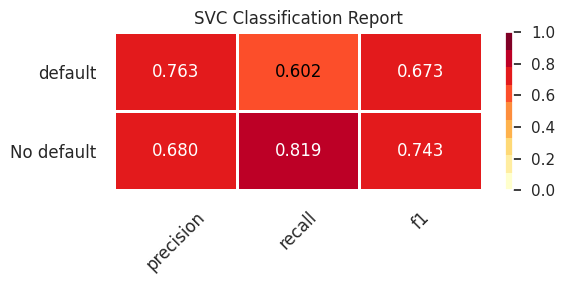

<Axes: title={'center': 'SVC Classification Report'}>

In [ ]:
# Classification Report
mapping = {0: "No default", 1:"default"}

fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(clf_svm,classes=["No default","default"], label_encoder=mapping)
cm_viz.score(X_test_scaled,y_test)
cm_viz.show()

# SVM Optimization

In [ ]:
param_grid = [
    {'C':[0.5,1,10,100,1000],
     'gamma':[1,0.1,0.001,0.0001],
     'kernel':['rbf']}]

svc_optimised = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'recall',
    verbose = 0)

svc_optimised.fit(X_train_sm_scaled,y_train_sm)
print(svc_optimised.best_params_)



{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# the results of optimization above shows that best params are 'C': 1000, 'gamma': 0.1
svc_final = SVC(random_state = 42, C = 1000, gamma = 0.1)
svc_final.fit(X_train_sm_scaled,y_train_sm)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


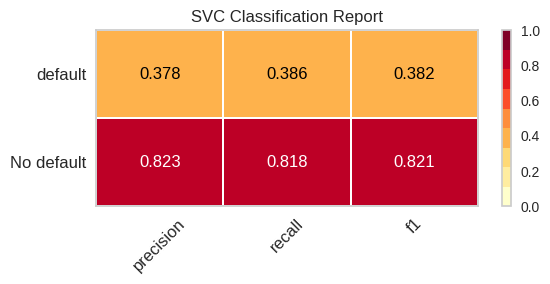

<Axes: title={'center': 'SVC Classification Report'}>

In [ ]:

mapping = {0: "No default", 1:"default"}

fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(svc_final,classes=["No default","default"], label_encoder=mapping)
cm_viz.score(X_test_scaled,y_test)
cm_viz.show()